In [1]:
!pwd

/content


In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [4]:
!nvidia-smi

Fri Dec 15 03:33:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 16094, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16094 (delta 0), reused 4 (delta 0), pack-reused 16089
Receiving objects: 100% (16094/16094), 14.82 MiB | 17.86 MiB/s, done.
Resolving deltas: 100% (11023/11023), done.


In [6]:
cd yolov5

/content/drive/MyDrive/yolov5


In [8]:
!pip install -r requirements.txt
!pip install --upgrade tensorflow

In [9]:
import torch
torch.__version__

'2.1.0+cu121'

In [10]:
!python train.py --data ../car/data.yaml --cfg yolov5s.yaml --weights 'yolov5s.pt' --batch-size 64

2023-12-15 03:35:33.175114: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 03:35:33.175179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 03:35:33.177254: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=../car/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, work

In [13]:
!python detect.py --weights runs/train/exp3/weights/best.pt --conf 0.5 --source test_night/images

detect: weights=['runs/train/exp3/weights/best.pt'], source=test_night/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/drive/MyDrive/yolov5/test_night/images/vehicle_0002678.jpg: 480x640 1 bus, 50.1ms
image 2/6 /content/drive/MyDrive/yolov5/test_night/images/vehicle_0003357.jpg: 480x640 1 minivan, 9.0ms
image 3/6 /content/drive/MyDrive/yolov5/test_night/images/vehicle_0004100.jpg: 480x640 1 sedan, 9.0ms
image 4/6 /content/driv

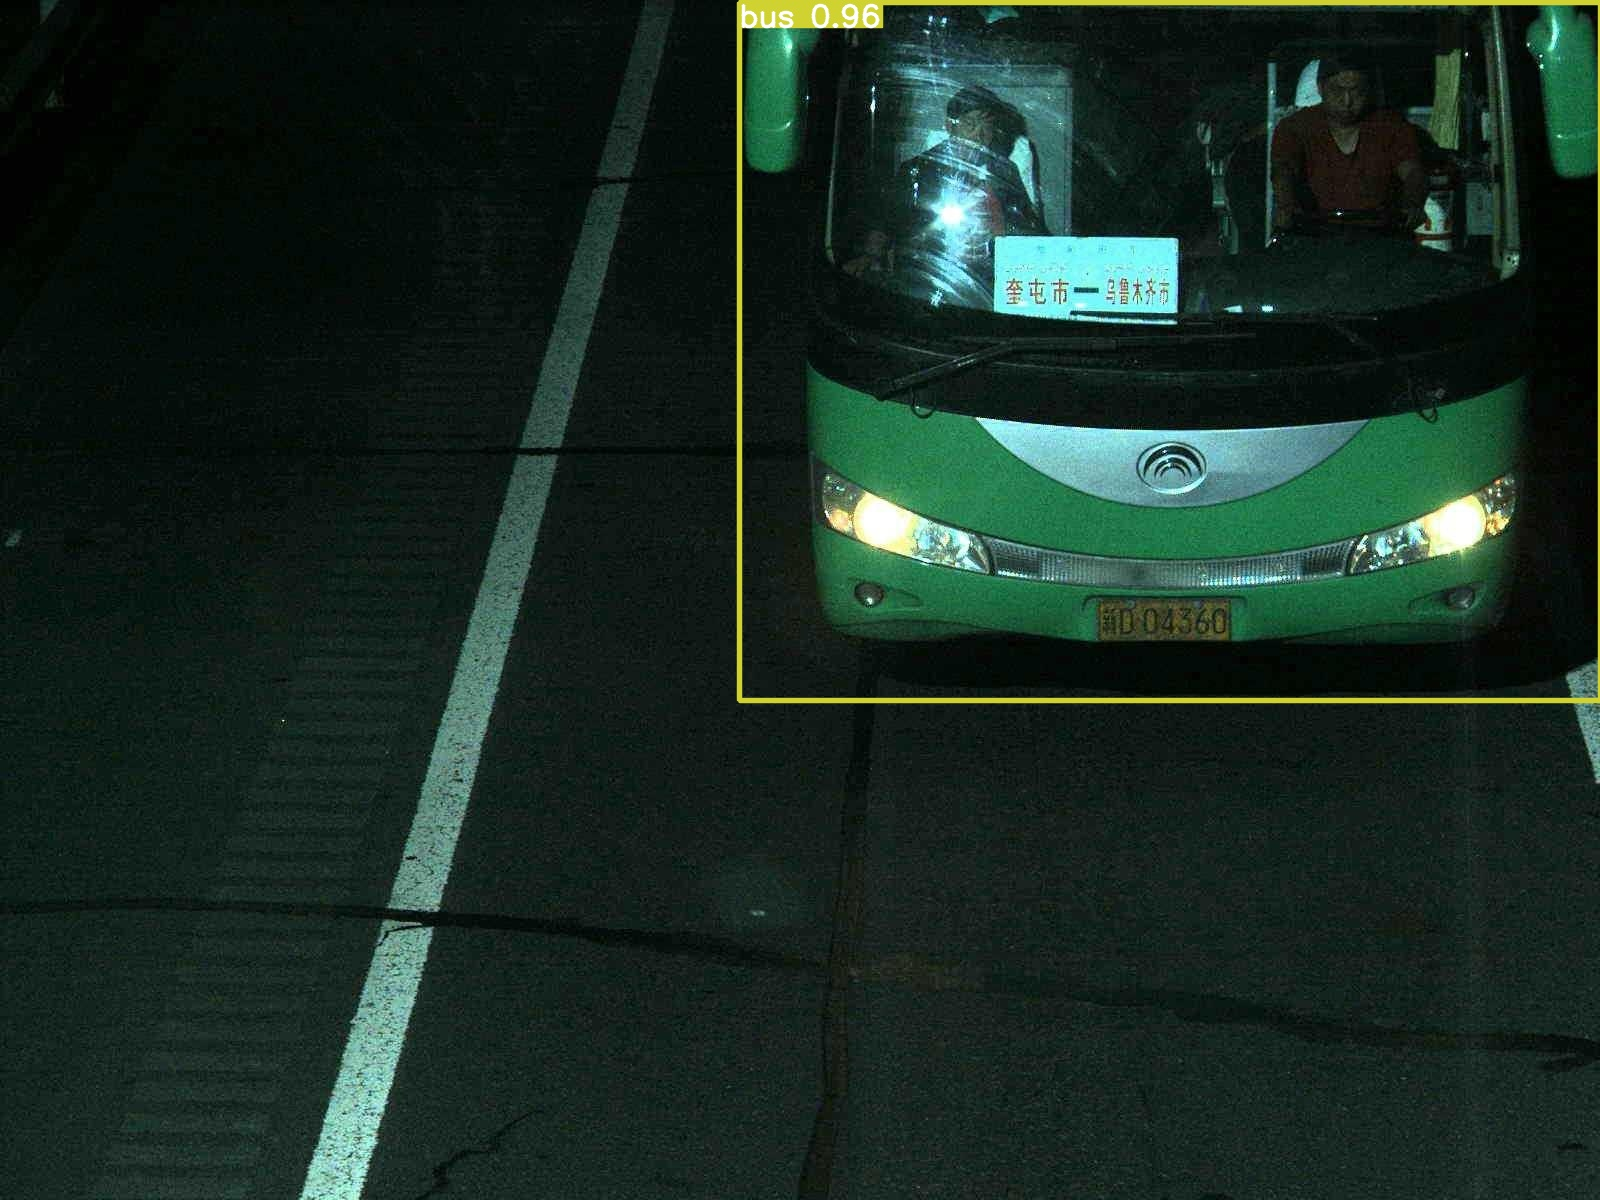

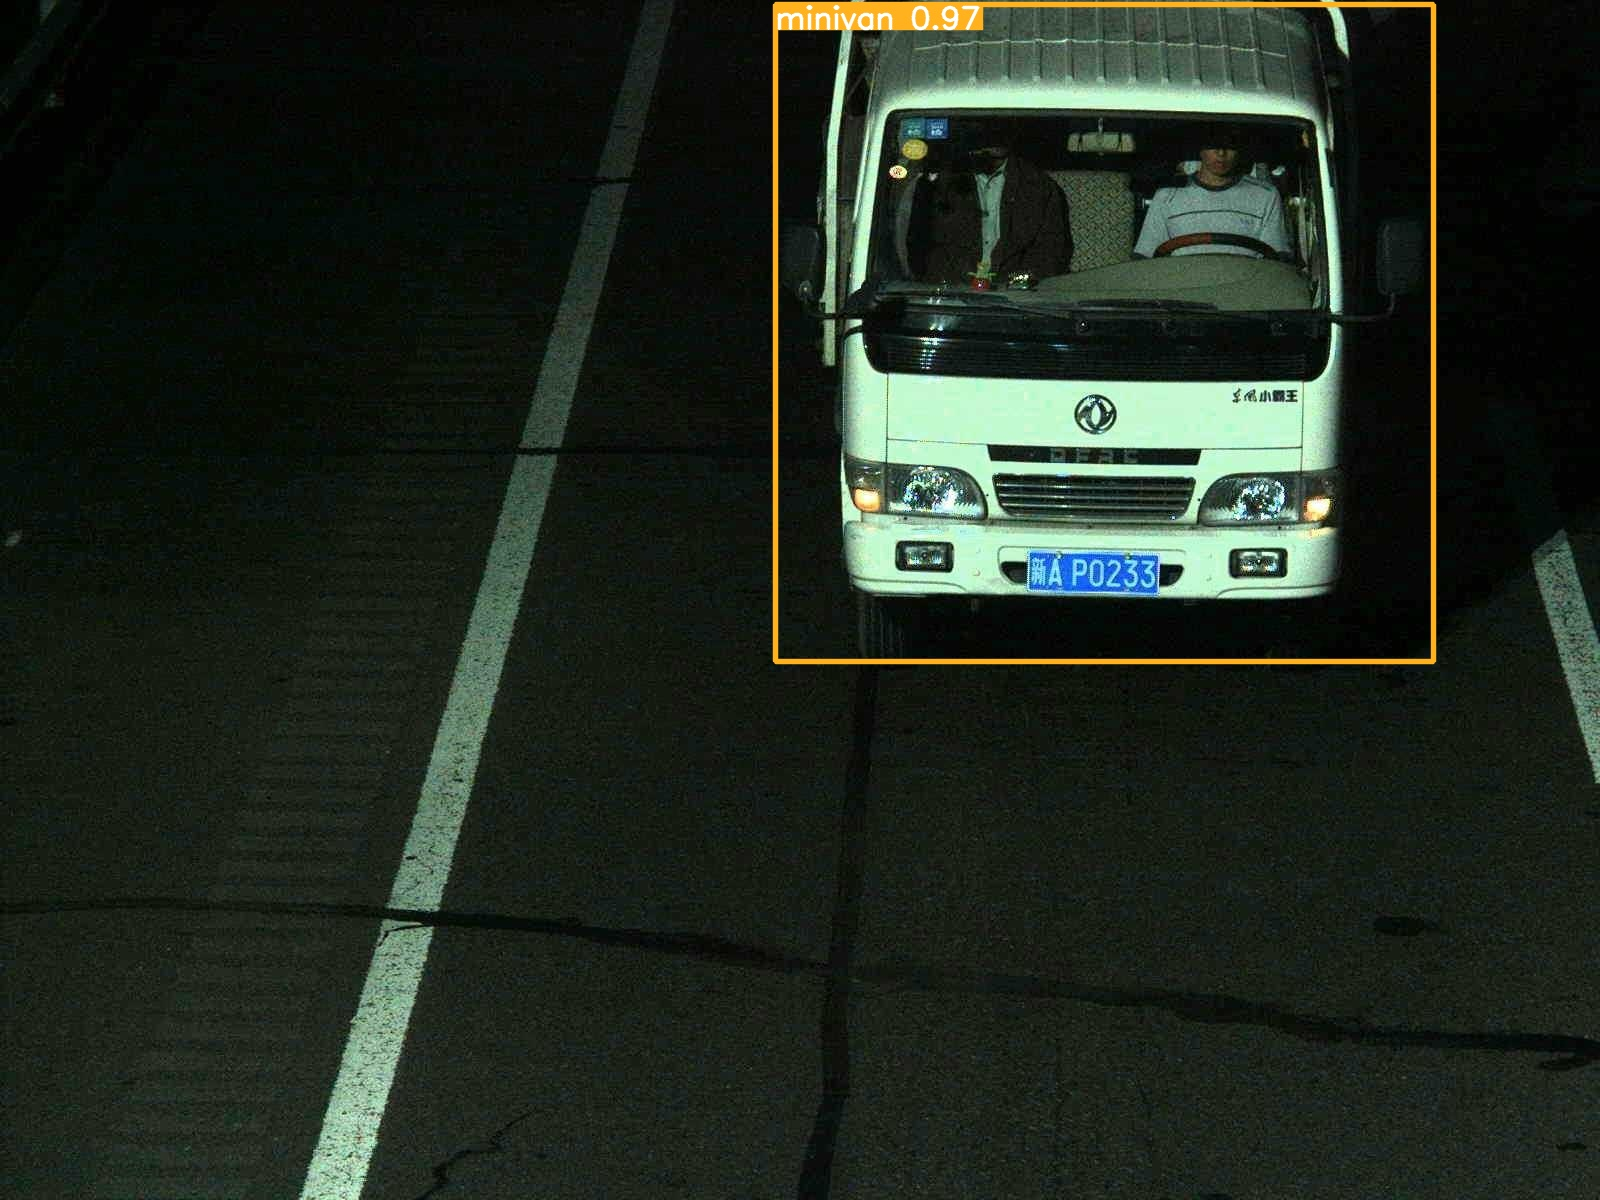

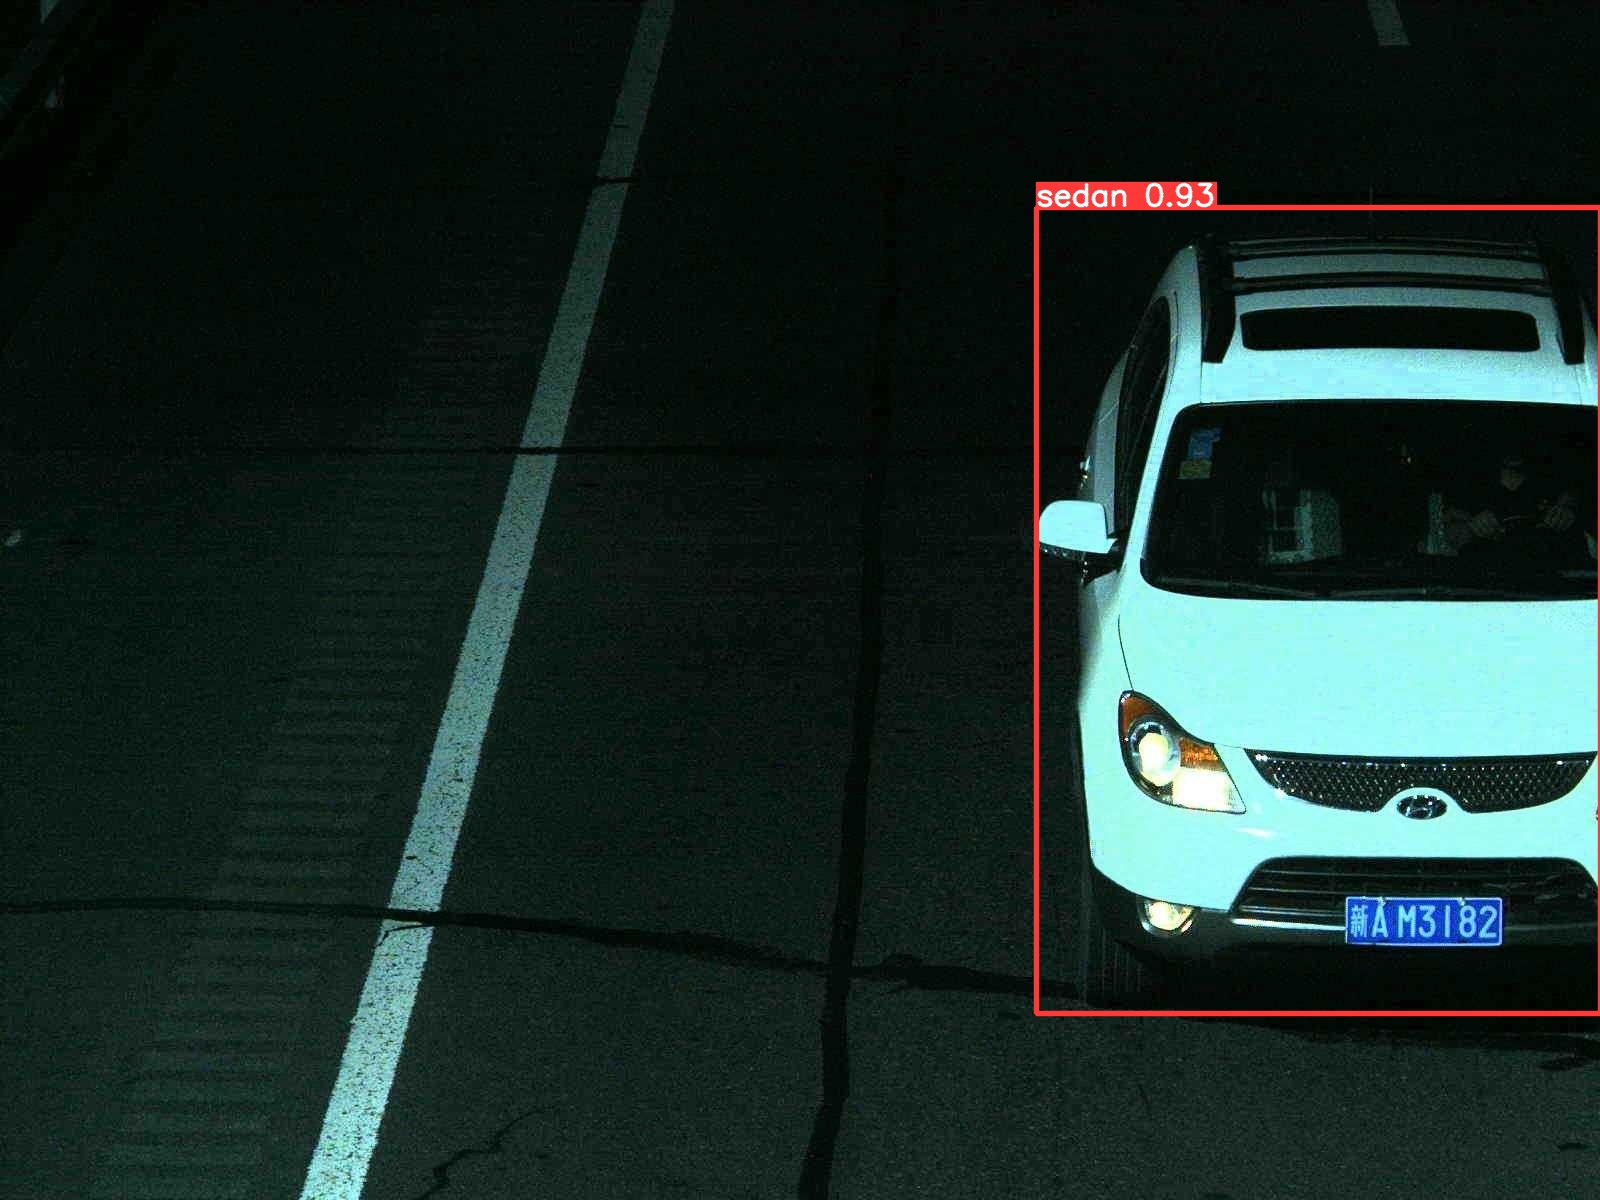

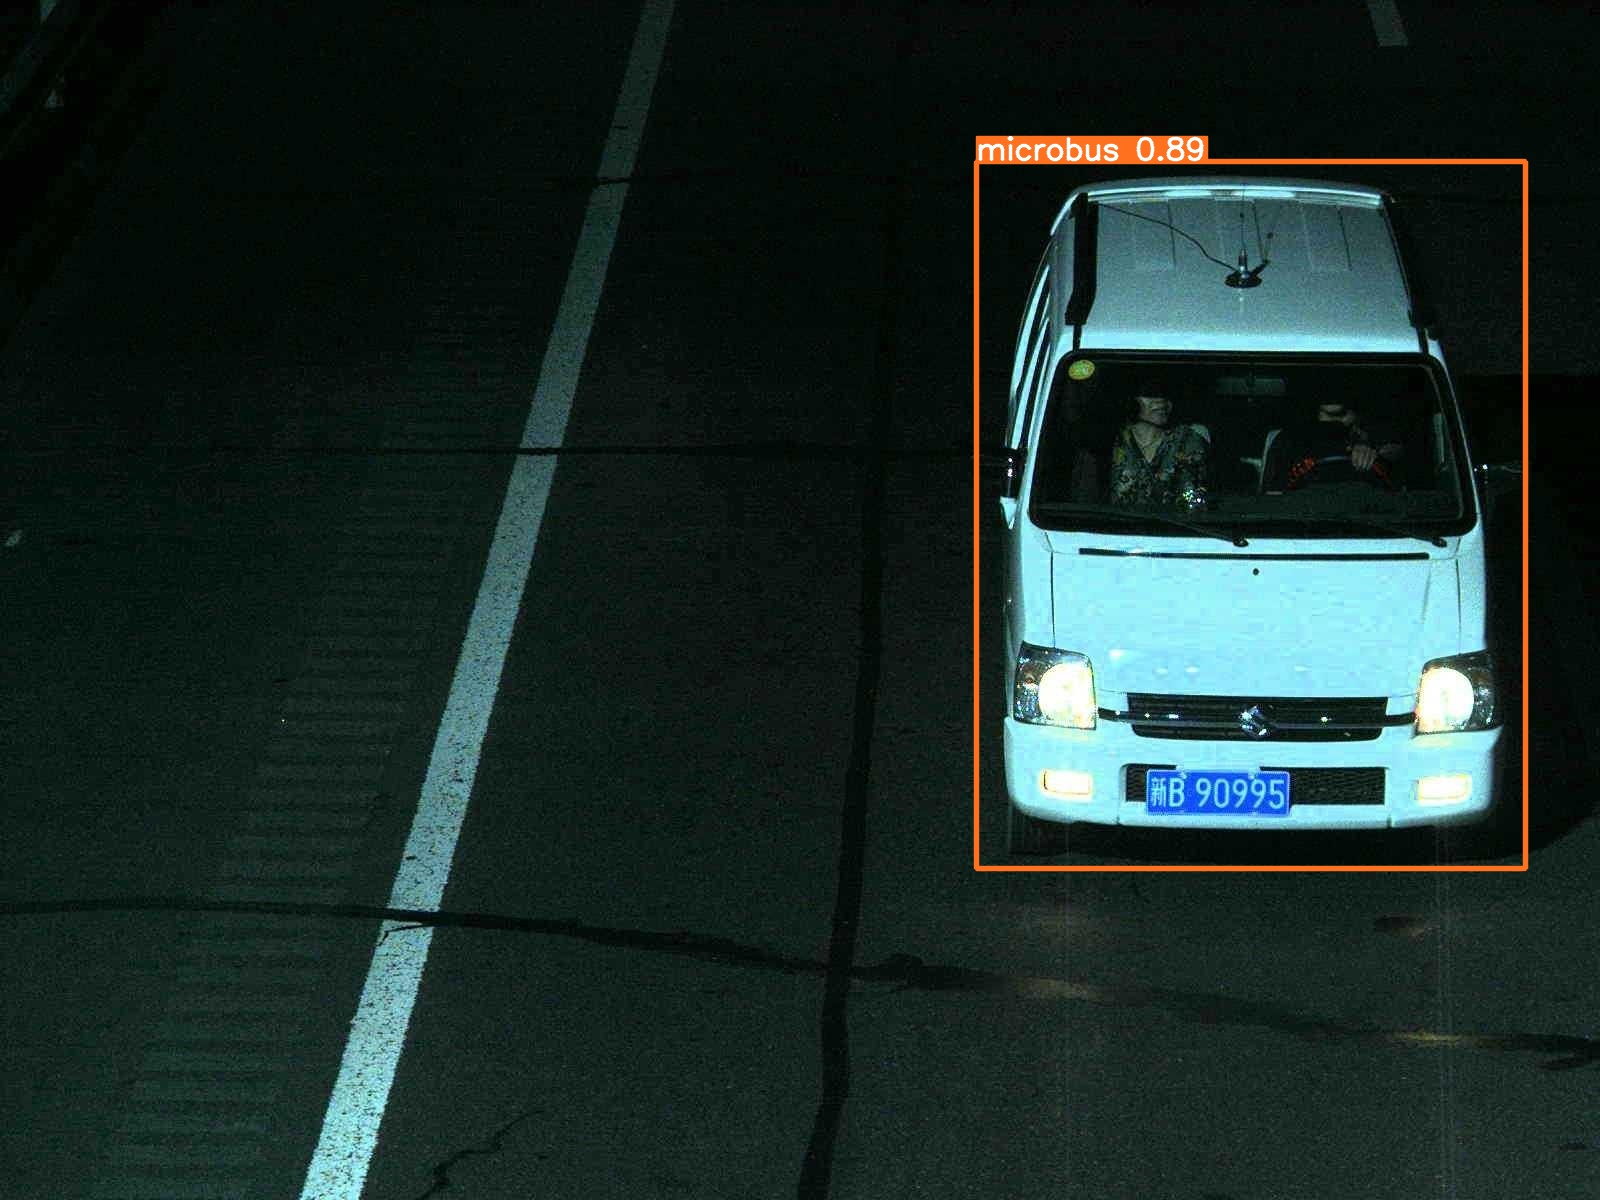

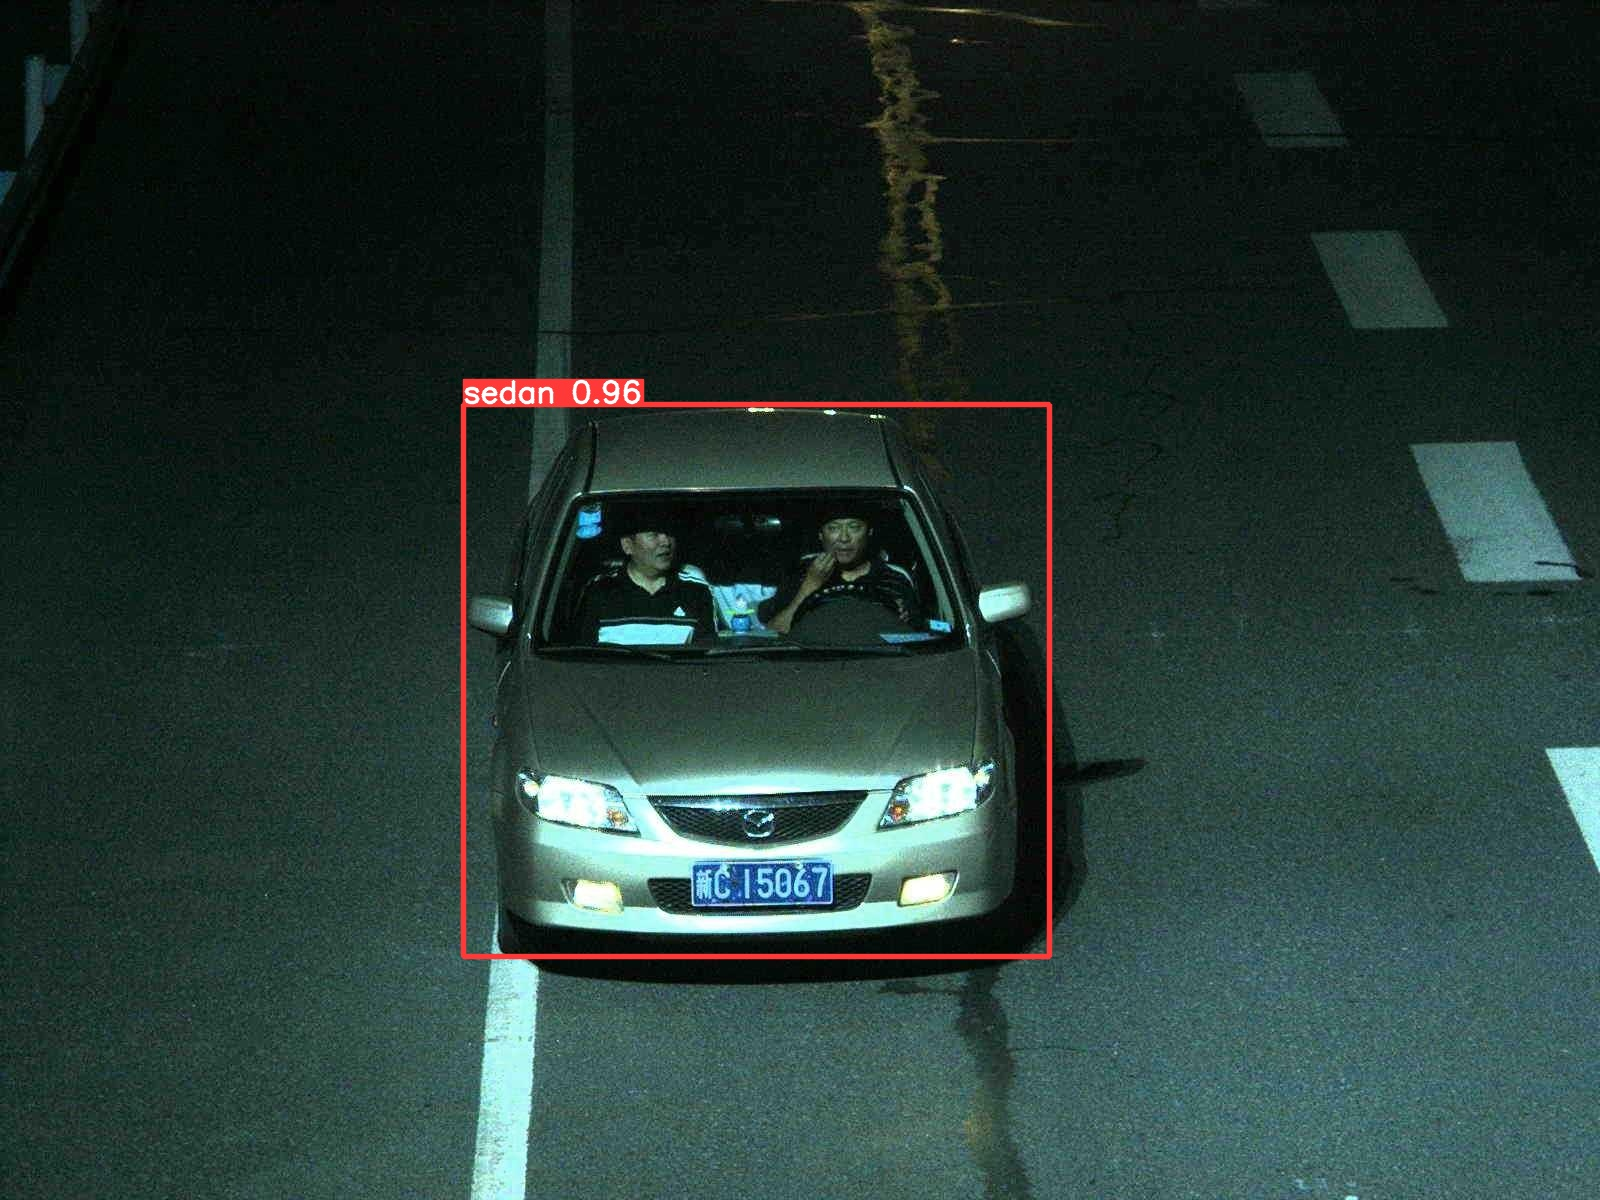

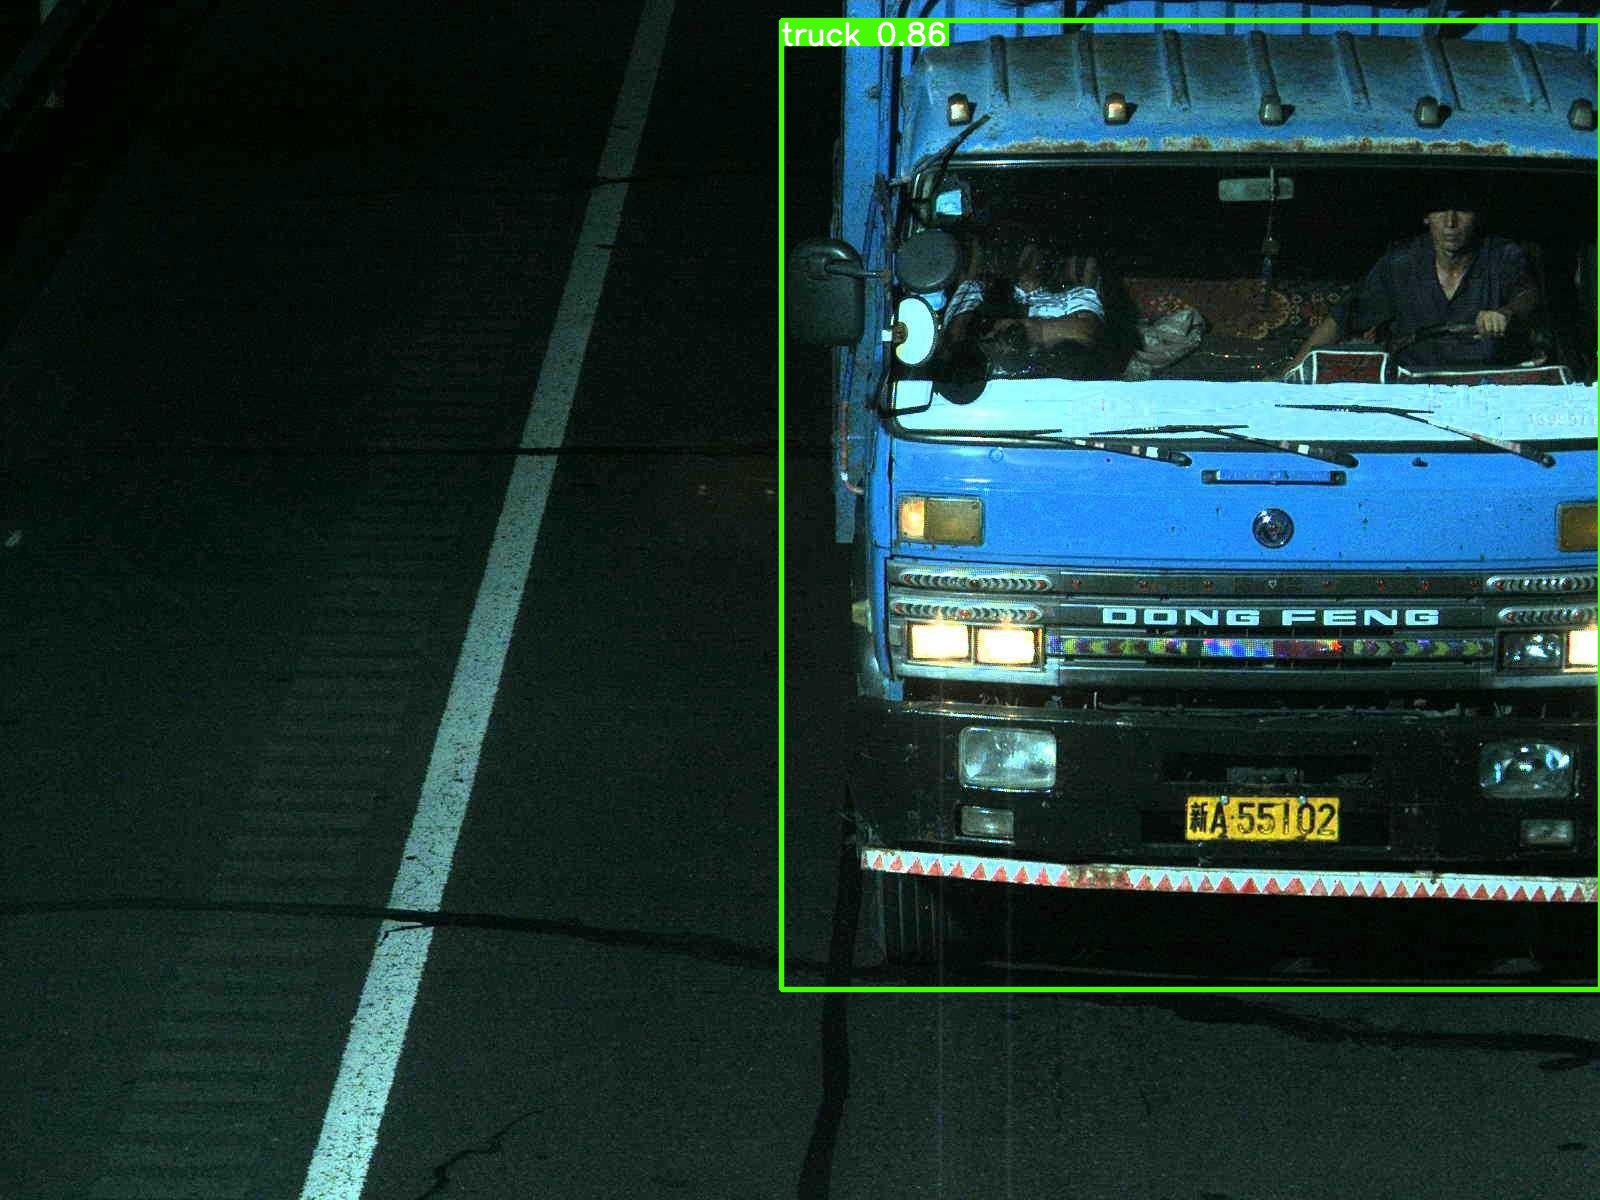

In [15]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp5/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")